<a href="https://colab.research.google.com/github/gustschaefer/CIFAR-10-using-Keras/blob/master/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set GPU (using google colab)  & libraries

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, AveragePooling2D, Flatten, Dropout
from keras.callbacks import TensorBoard


#Importing Dataset - CIFAR10

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

classes = len(np.unique(y_train))

#Plot images

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


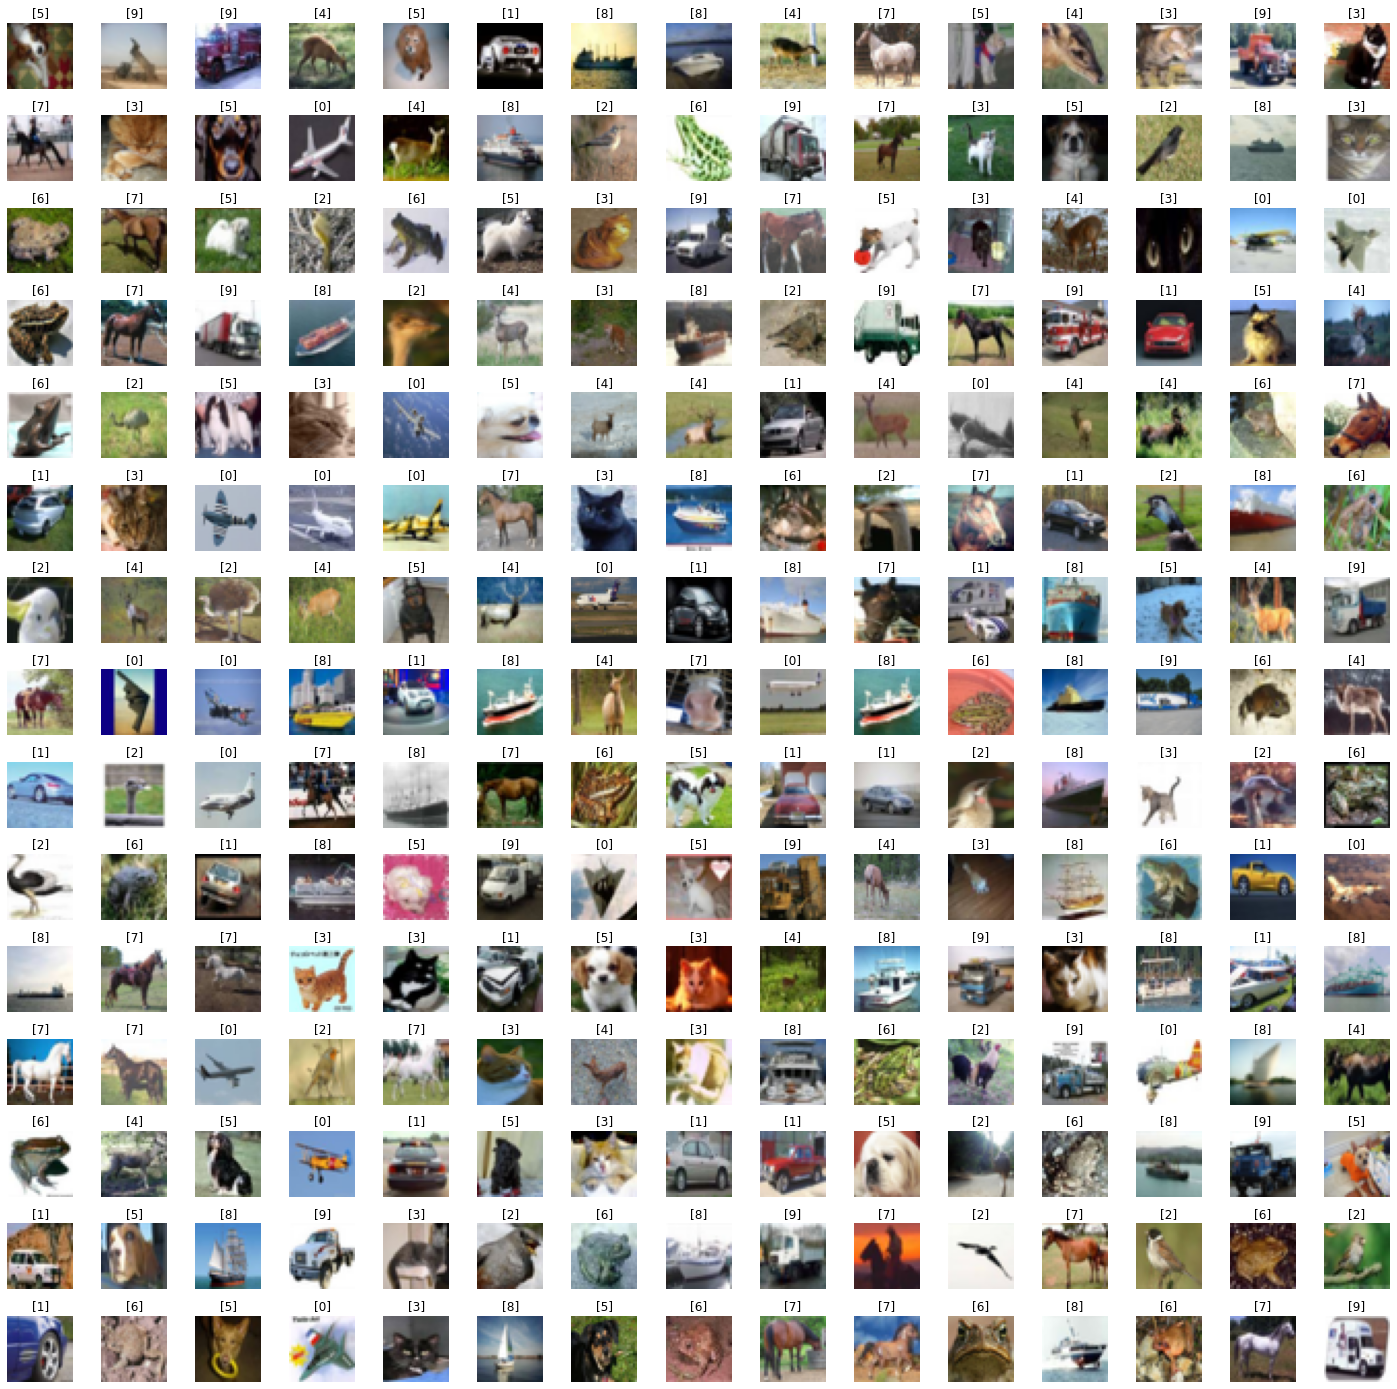

In [ ]:
L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

#Preparing data

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

from keras.utils import to_categorical
y_train_hot = np.array(to_categorical(y_train))
y_test_hot = np.array(to_categorical(y_test))

input_shape = X_train.shape[1:]

#CNN model


In [ ]:
batch_size = 64
epochs = 50

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(AveragePooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

fit_hist = model.fit(X_train, y_train_hot, batch_size = batch_size,
                     epochs = epochs, shuffle=True, validation_data = (X_test, y_test_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.2462 - accuracy: 0.9081 - val_loss: 0.2048 - val_accuracy: 0.9196
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.1912 - accuracy: 0.9252 - val_loss: 0.1714 - val_accuracy: 0.9331
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1637 - accuracy: 0.9356 - val_loss: 0.1676 - val_accuracy: 0.9352
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1448 - accuracy: 0.9433 - val_loss: 0.1501 - val_accuracy: 0.9420
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1302 - accuracy: 0.9484 - val_loss: 0.1313 - val_accuracy: 0.9487
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.1185 - accuracy: 0.9533 - val_loss: 0.1346 - val_accuracy: 0.9482
Epoch 7/50
50000/50000 [==============================] - 7s 1

#Model Evatualion

In [ ]:
model.evaluate(X_test, y_test_hot)

10000/10000 [==============================] - 1s 91us/step


[0.22034213898479937, 0.9536700248718262]